### 1. Import Libraries

In [1]:
# Import Libraries for dataframe
import datetime
import numpy as np
import pandas as pd

In [2]:
# Import Libraries for Data Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [3]:
# Import Libraries for KMeans Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 2. Import Data into DataFrames

In [4]:
xlsx = pd.ExcelFile('Data.xlsx')

In [5]:
pos_data_df = pd.read_excel(xlsx, 'POS DATA')
pos_data_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,2013-04-15,800220505783,2,1.960000,9.160004e+12
1,1103853519,2013-04-17,520139501183,1,5.349993,9.164002e+12
2,1092750793,2013-03-13,520423907421,6,1.740015,9.164013e+12
3,1106160983,2013-04-24,211069400000,1,0.749817,9.162006e+12
4,1108695491,2013-05-01,520286400380,2,0.600000,9.161004e+12


In [6]:
pos_data_df['Card_ID'] = pos_data_df['Card_ID'].fillna(0)
pos_data_df['Card_ID'] = pos_data_df['Card_ID'].apply(lambda x: int(x))
pos_data_df.tail()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
235469,1093498033,2013-03-15,210996300000,1,4.040059,9164013170608
235470,1102688274,2013-04-13,520423909932,1,1.000000,9162000154457
235471,1089686077,2013-03-04,210757000000,1,1.330066,9164003804728
235472,1099519315,2013-04-04,520423915759,2,3.180015,0
235473,1099162104,2013-04-03,520423910658,1,0.820015,0


In [7]:
pos_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235474 entries, 0 to 235473
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Basket_ID  235474 non-null  int64         
 1   Date       235474 non-null  datetime64[ns]
 2   Barcode    235474 non-null  int64         
 3   Sum_Units  235474 non-null  int64         
 4   Sum_Value  235474 non-null  float64       
 5   Card_ID    235474 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 10.8 MB


In [8]:
loyalty_df = pd.read_excel(xlsx, 'LOYALTY')
loyalty_df.head()

,CardholderID,Age,Gender,MaritalStatus,HouseholdSize,Children
0,9162002273446,51.0,Male,Single (Alone),1.0,0.0
1,9164011076155,72.0,Female,NaN,2.0,0.0
2,9162001049684,60.0,Female,NaN,1.0,0.0
3,9162005608405,NaN,Female,Married,5.0,NaN
4,9163002257856,50.0,Female,NaN,1.0,0.0


In [9]:
loyalty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191129 entries, 0 to 191128
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CardholderID   191129 non-null  int64  
 1   Age            110153 non-null  float64
 2   Gender         172195 non-null  object 
 3   MaritalStatus  37744 non-null   object 
 4   HouseholdSize  172034 non-null  float64
 5   Children       171451 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 7.3+ MB


In [10]:
barcodes_df = pd.read_excel(xlsx, 'barcodes')
barcodes_df.head()

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2
2,520223414111,30,21,3,3
3,400580827457,10,12,286,2
4,210213800000,20,51,110,1


In [11]:
barcodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9322 entries, 0 to 9321
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Barcode    9322 non-null   int64
 1   CategoryA  9322 non-null   int64
 2   CategoryB  9322 non-null   int64
 3   CategoryC  9322 non-null   int64
 4   CategoryD  9322 non-null   int64
dtypes: int64(5)
memory usage: 364.2 KB


In [12]:
prd_tax_df = pd.read_excel(xlsx, 'product taxonomy')
prd_tax_df.head()

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,DRINKS,261,BEVERAGES,1,cola
1,10,11,DRINKS,261,BEVERAGES,2,lime
2,10,11,DRINKS,261,BEVERAGES,3,juice
3,10,11,DRINKS,261,BEVERAGES,5,sport drinks
4,10,11,DRINKS,261,BEVERAGES,6,tea


In [13]:
prd_tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CategoryA             703 non-null    int64 
 1   CategoryB             703 non-null    int64 
 2   CategoryBDescription  703 non-null    object
 3   CategoryC             703 non-null    int64 
 4   CategoryCDescription  703 non-null    object
 5   CategoryD             703 non-null    int64 
 6   CategoryDDescription  703 non-null    object
dtypes: int64(4), object(3)
memory usage: 30.3+ KB


### 3. Data preprocessing

In [14]:
# Concatinate Category IDs in product taxonomy
prd_tax_df['Concat'] = prd_tax_df['CategoryA'].astype(str) + prd_tax_df['CategoryB'].astype(str) + prd_tax_df['CategoryC'].astype(str) + prd_tax_df['CategoryD'].astype(str)
prd_tax_df.head()

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription,Concat
0,10,11,DRINKS,261,BEVERAGES,1,cola,10112611
1,10,11,DRINKS,261,BEVERAGES,2,lime,10112612
2,10,11,DRINKS,261,BEVERAGES,3,juice,10112613
3,10,11,DRINKS,261,BEVERAGES,5,sport drinks,10112615
4,10,11,DRINKS,261,BEVERAGES,6,tea,10112616


In [15]:
# Concatinate Category IDs in barcode
barcodes_df['Concat'] = barcodes_df['CategoryA'].astype(str) + barcodes_df['CategoryB'].astype(str) + barcodes_df['CategoryC'].astype(str) + barcodes_df['CategoryD'].astype(str)
barcodes_df.head()

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD,Concat
0,360923242189,60,60,767,2,60607672
1,501132123894,10,12,287,2,10122872
2,520223414111,30,21,3,3,302133
3,400580827457,10,12,286,2,10122862
4,210213800000,20,51,110,1,20511101


In [16]:
# Merge Barcode Dataframe and Product Taxonomy Dataframe on Concat column
bar_prd_df = pd.merge(barcodes_df, prd_tax_df, on='Concat')
bar_prd_df.drop(['CategoryA_y', 'CategoryB_y', 'CategoryC_y', 'CategoryD_y'], axis=1, inplace=True)
bar_prd_df.rename(columns={'CategoryA_x': 'CategoryA', 'CategoryB_x': 'CategoryB', 'CategoryC_x': 'CategoryC', 'CategoryD_x': 'CategoryD' }, 
                  inplace=True)
bar_prd_df.head(15)

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD,Concat,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,360923242189,60,60,767,2,60607672,shoes,boys,Trainers BOY
1,360923242188,60,60,767,2,60607672,shoes,boys,Trainers BOY
2,360923242183,60,60,767,2,60607672,shoes,boys,Trainers BOY
3,360923242197,60,60,767,2,60607672,shoes,boys,Trainers BOY
4,360923242192,60,60,767,2,60607672,shoes,boys,Trainers BOY
5,360923242191,60,60,767,2,60607672,shoes,boys,Trainers BOY
6,360923242185,60,60,767,2,60607672,shoes,boys,Trainers BOY
7,360923242187,60,60,767,2,60607672,shoes,boys,Trainers BOY
8,360923242182,60,60,767,2,60607672,shoes,boys,Trainers BOY
9,360923242196,60,60,767,2,60607672,shoes,boys,Trainers BOY


In [17]:
# Convert Date column to datetime stamp
pos_data_df['Day'] = pos_data_df['Date'].dt.day_name()
pos_data_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Day
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,Monday
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,Wednesday
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,Wednesday
3,1106160983,2013-04-24,211069400000,1,0.749817,9162005811409,Wednesday
4,1108695491,2013-05-01,520286400380,2,0.600000,9161003517351,Wednesday


In [18]:
# Merge bar_prd_df Dataframe and POS DATA Dataframe on barcode column
pos_prd_df = pd.merge(pos_data_df, bar_prd_df, on='Barcode')
pos_prd_df.drop(['CategoryA', 'CategoryB', 'CategoryC', 'CategoryD', 'Concat'], axis=1, inplace=True)
pos_prd_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Day,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,Monday,Grocery Food,pet,cat
1,1098000980,2013-03-30,800220505783,2,1.960000,9160001242098,Saturday,Grocery Food,pet,cat
2,1101855276,2013-04-11,800220505783,1,0.980015,9163002314061,Thursday,Grocery Food,pet,cat
3,1104210367,2013-04-18,800220505783,3,2.940015,9164013170684,Thursday,Grocery Food,pet,cat
4,1097159868,2013-03-28,800220505783,1,0.980015,9164013172312,Thursday,Grocery Food,pet,cat


In [19]:
# Separate Returned Items from Purchased Items
return_prd_df = pos_prd_df[pos_prd_df['Sum_Units'] < 0]
return_prd_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Day,CategoryBDescription,CategoryCDescription,CategoryDDescription
1769,1105819068,2013-04-23,212878100000,-1,-4.112516,0,Tuesday,DAIRY PRODUCTS,cheese (counter),feta
2950,1105819068,2013-04-23,211087700000,-1,-3.350961,0,Tuesday,fruits and vegetables,fresh vegetables,TOMATOES
8411,1092385416,2013-03-12,2091199,-1,-0.400000,0,Tuesday,fruits and vegetables,fresh vegetables,herbs
8604,1092384861,2013-03-12,2091199,-1,-0.400000,0,Tuesday,fruits and vegetables,fresh vegetables,herbs
9923,1090775940,2013-03-07,520423930913,-1,-1.050007,0,Thursday,Grocery Food,sugar,poweder


In [20]:
# Remove negative values from purchase data frame
indexNames = pos_prd_df[pos_prd_df['Sum_Units'] < 0].index
pos_prd_df.drop(indexNames , inplace=True)
pos_prd_df

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Day,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,Monday,Grocery Food,pet,cat
1,1098000980,2013-03-30,800220505783,2,1.960000,9160001242098,Saturday,Grocery Food,pet,cat
2,1101855276,2013-04-11,800220505783,1,0.980015,9163002314061,Thursday,Grocery Food,pet,cat
3,1104210367,2013-04-18,800220505783,3,2.940015,9164013170684,Thursday,Grocery Food,pet,cat
4,1097159868,2013-03-28,800220505783,1,0.980015,9164013172312,Thursday,Grocery Food,pet,cat
...,...,...,...,...,...,...,...,...,...,...
231598,1090445519,2013-03-06,501067792583,1,9.500014,9163003867559,Wednesday,DRINKS,aperifif,Vermouth
231599,1094755771,2013-03-20,763890024835,1,2.749993,0,Wednesday,hardware,batteries,ALKALINE
231600,1089674763,2013-03-04,2610228479,3,12.300014,0,Monday,household,glasses,GLASSES
231601,1100781409,2013-04-08,356007030379,1,3.090007,9161003517269,Monday,Detergents,cleaners,bathroom cleaner


### 4. Exploratory Data Analysis

In [21]:
# Descriptive Statistics
pos_prd_df[['Sum_Units', 'Sum_Value']].describe()

,Sum_Units,Sum_Value
count,231171.000000,231171.000000
mean,1.272422,2.384862
std,0.814355,3.514186
min,1.000000,0.000000
25%,1.000000,0.980015
50%,1.000000,1.640000
75%,1.000000,2.700015
max,21.000000,151.600006


Text(0.5, 1, 'Total Value of Purchase')

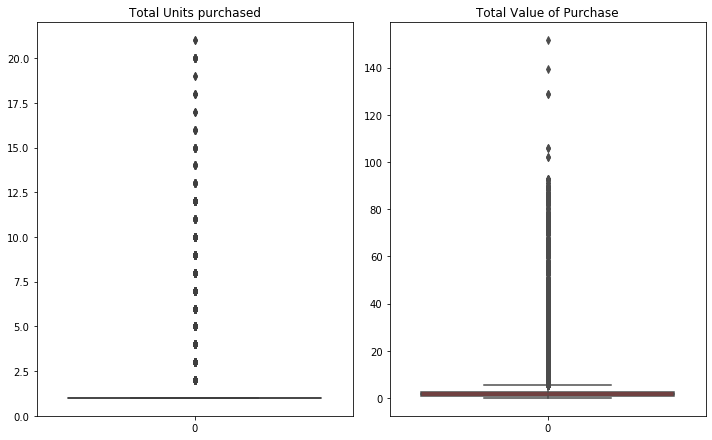

In [22]:
# Outliers
# Box plot to check outliers
fig, axes = plt.subplots(1,2, figsize=(10,6))
sns.boxplot(data=pos_prd_df['Sum_Units'], orient='v', ax=axes[0])
sns.boxplot(data=pos_prd_df['Sum_Value'], orient='v', ax=axes[1], color='red')
plt.tight_layout()
axes[0].set_title('Total Units purchased')
axes[1].set_title('Total Value of Purchase')

### 5. Basket Analysis

In [23]:
# % Purchase per day
pos_prd_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Day,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,Monday,Grocery Food,pet,cat
1,1098000980,2013-03-30,800220505783,2,1.960000,9160001242098,Saturday,Grocery Food,pet,cat
2,1101855276,2013-04-11,800220505783,1,0.980015,9163002314061,Thursday,Grocery Food,pet,cat
3,1104210367,2013-04-18,800220505783,3,2.940015,9164013170684,Thursday,Grocery Food,pet,cat
4,1097159868,2013-03-28,800220505783,1,0.980015,9164013172312,Thursday,Grocery Food,pet,cat


Text(0.5, 1.0, 'Percentage of Basket Sold per Day of Week')

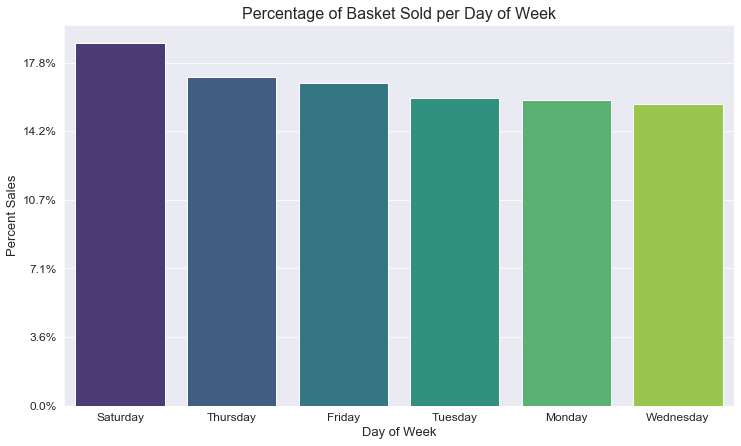

In [107]:
#1. Number of baskets per day
grp_day = pos_prd_df.groupby(by=['Day', 'Basket_ID']).count()
df1 = grp_day.groupby('Day').size().reset_index(name='count').sort_values(['count'], ascending=[False])

plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
fig1 = sns.barplot(x='Day', y='count', data=df1, palette='viridis')
fig1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=df1['count'].sum()))
plt.xlabel('Day of Week', fontsize=13)
plt.ylabel('Percent Sales', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Percentage of Basket Sold per Day of Week', fontsize=16)

In [25]:
# Piechart for Categories sold per day
grp_catg_B = pos_prd_df.groupby(by=['Day', 'CategoryBDescription']).count()
mon_sales = grp_catg_B.xs('Monday').sort_values(by='Barcode', ascending=False).head(5)
tue_sales = grp_catg_B.xs('Tuesday').sort_values(by='Barcode', ascending=False).head(5)
wed_sales = grp_catg_B.xs('Wednesday').sort_values(by='Barcode', ascending=False).head(5)
thu_sales = grp_catg_B.xs('Thursday').sort_values(by='Barcode', ascending=False).head(5)
fri_sales = grp_catg_B.xs('Friday').sort_values(by='Barcode', ascending=False).head(5)
sat_sales = grp_catg_B.xs('Saturday').sort_values(by='Barcode', ascending=False).head(5)

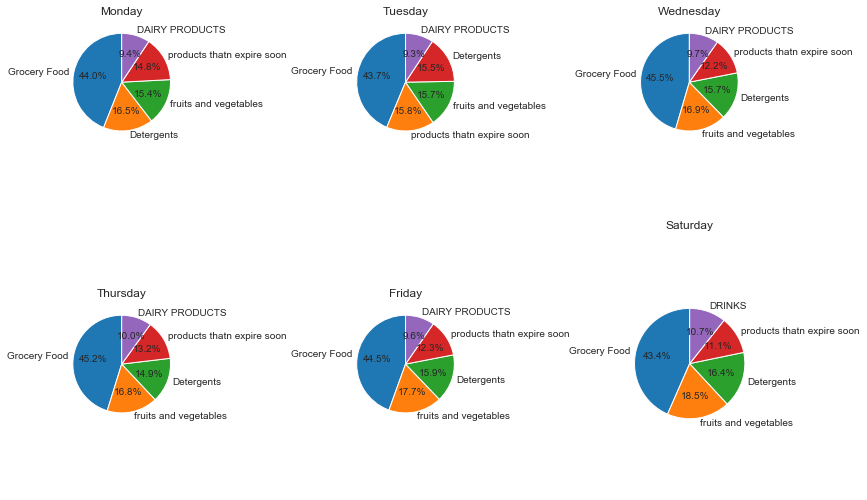

In [26]:
# Plot piechart for type of items purchased on different days
fig, axes = plt.subplots(2, 3, figsize=(12,8))

plt.subplot(2,3,1)
plt.pie(mon_sales['Barcode'], explode=(0, 0, 0, 0, 0), labels=mon_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Monday')

plt.subplot(2,3,2)
plt.pie(tue_sales['Barcode'], explode=(0, 0, 0, 0, 0), labels=tue_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Tuesday')

plt.subplot(2,3,3)
plt.pie(wed_sales['Barcode'], explode=(0, 0, 0, 0, 0), labels=wed_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Wednesday')

plt.subplot(2,3,4)
plt.pie(thu_sales['Barcode'], explode=(0, 0, 0, 0, 0), labels=thu_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Thursday')

plt.subplot(2,3,5)
plt.pie(fri_sales['Barcode'], explode=(0, 0, 0, 0, 0), labels=fri_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Friday')

plt.subplot(2,3,6)
plt.title('Saturday')
plt.pie(sat_sales['Barcode'], explode=(0, 0, 0, 0, 0), labels=sat_sales.index, autopct='%1.1f%%', startangle=90)

plt.axis('equal')  
plt.tight_layout()

In [27]:
weekday_sales = pd.concat([mon_sales['Barcode'], tue_sales['Barcode'], wed_sales['Barcode'], 
                           thu_sales['Barcode'], fri_sales['Barcode']], 
                          axis=1)
weekday_sales.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_sales['mean'] = weekday_sales.mean(axis=1)
weekday_sales

,Monday,Tuesday,Wednesday,Thursday,Friday,mean
Grocery Food,12423,12424,12106,13756,13193,12780.4
Detergents,4657,4392,4193,4524,4700,4493.2
fruits and vegetables,4350,4468,4492,5108,5244,4732.4
products thatn expire soon,4182,4493,3256,4002,3659,3918.4
DAIRY PRODUCTS,2645,2631,2584,3028,2854,2748.4


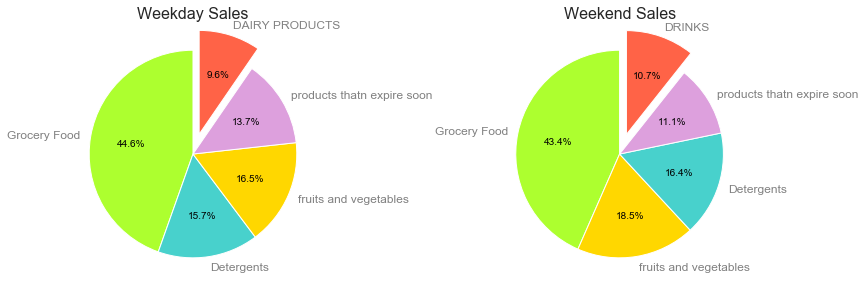

In [28]:
# Category Sales Weekday Vs. Weekend

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Weekday Sales', fontsize=16)
patches, texts, pcttexts = plt.pie(weekday_sales['mean'], explode=(0, 0, 0, 0, 0.2), 
                                   colors=['greenyellow', 'mediumturquoise', 'gold', 'plum', 'tomato'], 
                                   labels=weekday_sales.index, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('grey')
    text.set_fontsize(12)
for pcttext in pcttexts:
    pcttext.set_color('black')
    pcttext.set_fontsize(10)


plt.subplot(1,2,2)
plt.title('Weekend Sales', fontsize=16)
patches, texts, pcttexts = plt.pie(sat_sales['Barcode'], explode=(0, 0, 0, 0, 0.2), 
                                   colors=['greenyellow', 'gold', 'mediumturquoise', 'plum', 'tomato'],  
                                   labels=sat_sales.index, autopct='%1.1f%%', startangle=90)
for text in texts:
    text.set_color('grey')
    text.set_fontsize(12)
for pcttext in pcttexts:
    pcttext.set_color('black')
    pcttext.set_fontsize(10)
  

plt.tight_layout()

Text(0.5, 0, 'Total Products')

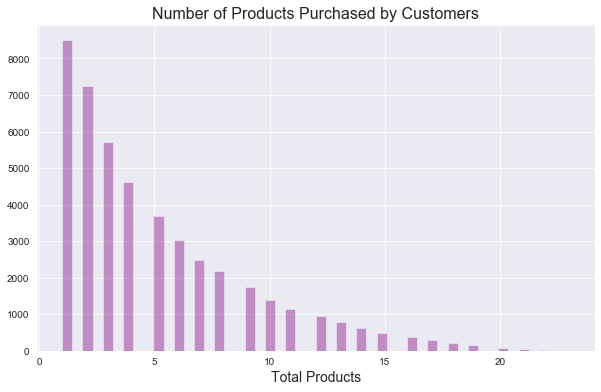

In [29]:
# 2. Top 5 Categories of products for each size of basket

# Histogram of number of products per baseket
basket_prd_count = (pos_prd_df['Basket_ID'].value_counts()).to_frame().reset_index()
basket_prd_count.rename(columns={'index': 'Basket_ID', 'Basket_ID': 'Total_Products'}, inplace=True)
plt.figure(figsize=(10,6))
sns.distplot(basket_prd_count['Total_Products'], kde=False, color='purple')
plt.title('Number of Products Purchased by Customers', fontsize=16)
plt.xlabel('Total Products', fontsize=14)

Text(0, 0.5, '')

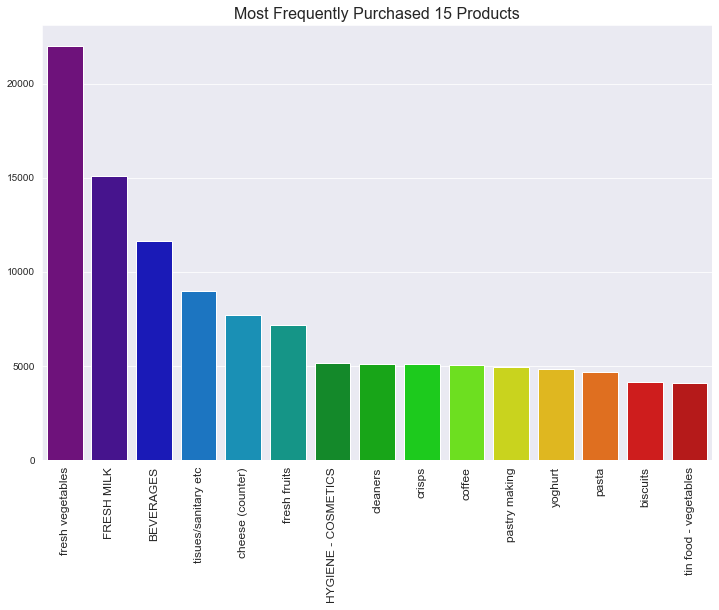

In [33]:
# 3. What products were bought together - MARKET BASKET ANALYSIS

# 15 Most Commonly Sold Products
plt.figure(figsize=(12,8))
sns.countplot(x='CategoryCDescription', 
              data=pos_prd_df, order=pos_prd_df['CategoryCDescription'].value_counts().iloc[:15].index,
             palette='nipy_spectral')
plt.xticks(rotation=90, fontsize=12)
plt.title('Most Frequently Purchased 15 Products', fontsize=16)
plt.xlabel('')
plt.ylabel('')

In [34]:
# MBA on Category B performed on Tableau


In [35]:
# 4. KMeans Clustering

In [36]:
# Check for null value
pos_prd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231171 entries, 0 to 231602
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Basket_ID             231171 non-null  int64         
 1   Date                  231171 non-null  datetime64[ns]
 2   Barcode               231171 non-null  int64         
 3   Sum_Units             231171 non-null  int64         
 4   Sum_Value             231171 non-null  float64       
 5   Card_ID               231171 non-null  int64         
 6   Day                   231171 non-null  object        
 7   CategoryBDescription  231171 non-null  object        
 8   CategoryCDescription  231171 non-null  object        
 9   CategoryDDescription  231171 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 23.9+ MB


In [37]:
# Convert Basket ID to String as per business standards
pos_prd_df['Basket_ID'] = pos_data_df['Basket_ID'].astype(str)

In [38]:
# Analyse Customers based on Size of Basket and Cost of Basekt
bskt_tot_unit = pos_data_df.groupby('Basket_ID')['Sum_Units'].count()
bskt_tot_unit = bskt_tot_unit.reset_index()

bskt_tot_val = pos_data_df.groupby('Basket_ID')['Sum_Value'].sum()
bskt_tot_val = bskt_tot_val.reset_index()

print(bskt_tot_unit.head())
print()
print(bskt_tot_val.head())

    Basket_ID  Sum_Units
0  1089674688          2
1  1089674689          4
2  1089674690          2
3  1089674691          7
4  1089674692         11

    Basket_ID  Sum_Value
0  1089674688   4.669318
1  1089674689   3.590022
2  1089674690   3.000000
3  1089674691  16.442612
4  1089674692  39.129832


In [39]:
# Merge the two dfs
bskt_tot = pd.merge(bskt_tot_unit, bskt_tot_val, on='Basket_ID')
bskt_tot.head()

,Basket_ID,Sum_Units,Sum_Value
0,1089674688,2,4.669318
1,1089674689,4,3.590022
2,1089674690,2,3.000000
3,1089674691,7,16.442612
4,1089674692,11,39.129832


In [40]:
# Rescaling Data
bskt_tot_df = bskt_tot[['Sum_Units', 'Sum_Value']]

# Create an instance
scaler = StandardScaler()

# fit_transform
bskt_tot_df_scaled = scaler.fit_transform(bskt_tot_df)
bskt_tot_df_scaled = pd.DataFrame(bskt_tot_df_scaled)
bskt_tot_df_scaled.columns = ['Sum_Units', 'Sum_Value']
bskt_tot_df_scaled.head()

,Sum_Units,Sum_Value
0,-0.745927,-0.628560
1,-0.259766,-0.721843
2,-0.745927,-0.772838
3,0.469474,0.389001
4,1.441795,2.349847


In [41]:
# Find th correct value of K using Elbow Method
ssd = []
cluster_range = np.arange(2,15)
for each_cluster in cluster_range:
    kmeans = KMeans(n_clusters=each_cluster)
    kmeans.fit(bskt_tot_df_scaled)
    
    ssd.append(kmeans.inertia_)

(array([ 5000., 10000., 15000., 20000., 25000., 30000., 35000., 40000.,
        45000.]),
 <a list of 9 Text yticklabel objects>)

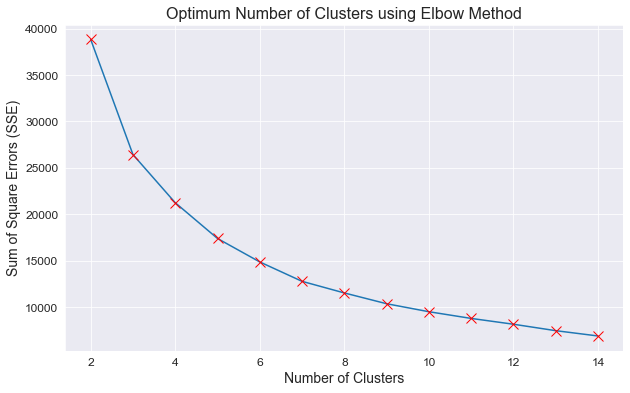

In [42]:
# Plot SSD Graph for each value of cluster
plt.figure(figsize=(10,6))
plt.plot(cluster_range, ssd, marker='x', ms=10, mec='red')
plt.title('Optimum Number of Clusters using Elbow Method', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Sum of Square Errors (SSE)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [43]:
# Clustering done on K = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(bskt_tot_df_scaled)

# Predicted Cluster
bskt_tot_df_scaled['cluster'] = kmeans.predict(bskt_tot_df_scaled)
bskt_tot_df_scaled.head()

,Sum_Units,Sum_Value,cluster
0,-0.745927,-0.628560,1
1,-0.259766,-0.721843,1
2,-0.745927,-0.772838,1
3,0.469474,0.389001,0
4,1.441795,2.349847,2


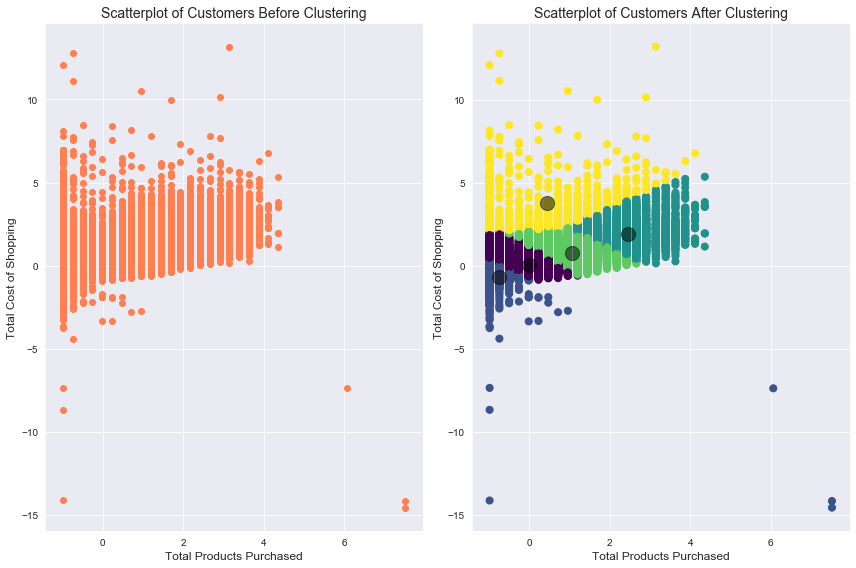

In [44]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.scatter(bskt_tot_df_scaled['Sum_Units'], bskt_tot_df_scaled['Sum_Value'], c='coral')
plt.title('Scatterplot of Customers Before Clustering', fontsize=14)
plt.xlabel('Total Products Purchased', fontsize=12)
plt.ylabel('Total Cost of Shopping', fontsize=12)

plt.subplot(1,2,2)
plt.scatter(bskt_tot_df_scaled['Sum_Units'], bskt_tot_df_scaled['Sum_Value'], c=bskt_tot_df_scaled['cluster'], 
            s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Scatterplot of Customers After Clustering', fontsize=14)
plt.xlabel('Total Products Purchased', fontsize=12)
plt.ylabel('Total Cost of Shopping', fontsize=12)

plt.tight_layout()

In [45]:
# Q3. Return Based Analysis
return_prd_df.head()

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Day,CategoryBDescription,CategoryCDescription,CategoryDDescription
1769,1105819068,2013-04-23,212878100000,-1,-4.112516,0,Tuesday,DAIRY PRODUCTS,cheese (counter),feta
2950,1105819068,2013-04-23,211087700000,-1,-3.350961,0,Tuesday,fruits and vegetables,fresh vegetables,TOMATOES
8411,1092385416,2013-03-12,2091199,-1,-0.400000,0,Tuesday,fruits and vegetables,fresh vegetables,herbs
8604,1092384861,2013-03-12,2091199,-1,-0.400000,0,Tuesday,fruits and vegetables,fresh vegetables,herbs
9923,1090775940,2013-03-07,520423930913,-1,-1.050007,0,Thursday,Grocery Food,sugar,poweder


In [46]:
# Convert all negative values in Sum_Value and Sum_units
return_prd_df['Sum_Units'] = return_prd_df['Sum_Units'].apply(lambda x: x * -1 if (x < 0) else x)
return_prd_df['Sum_Value'] = return_prd_df['Sum_Value'].apply(lambda x: x * -1 if (x < 0) else x)
return_prd_df.head()

c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Day,CategoryBDescription,CategoryCDescription,CategoryDDescription
1769,1105819068,2013-04-23,212878100000,1,4.112516,0,Tuesday,DAIRY PRODUCTS,cheese (counter),feta
2950,1105819068,2013-04-23,211087700000,1,3.350961,0,Tuesday,fruits and vegetables,fresh vegetables,TOMATOES
8411,1092385416,2013-03-12,2091199,1,0.400000,0,Tuesday,fruits and vegetables,fresh vegetables,herbs
8604,1092384861,2013-03-12,2091199,1,0.400000,0,Tuesday,fruits and vegetables,fresh vegetables,herbs
9923,1090775940,2013-03-07,520423930913,1,1.050007,0,Thursday,Grocery Food,sugar,poweder


Text(0, 0.5, '')

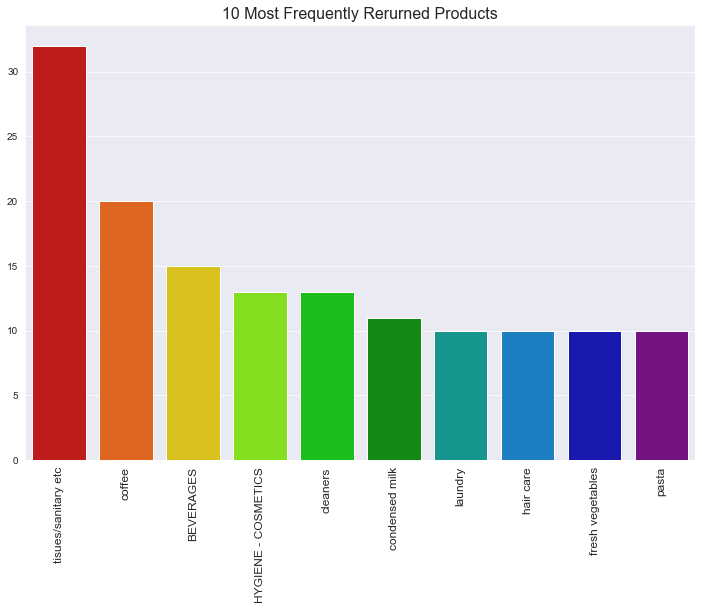

In [47]:
# 1. Returns
# 15 Most Commonly Returned Products
plt.figure(figsize=(12,8))
sns.countplot(x='CategoryCDescription', 
              data=return_prd_df, order=return_prd_df['CategoryCDescription'].value_counts().iloc[:10].index,
             palette='nipy_spectral_r')
plt.xticks(rotation=90, fontsize=12)
plt.title('10 Most Frequently Rerurned Products', fontsize=16)
plt.xlabel('')
plt.ylabel('')

In [108]:
# 2. Predict shopping rate in future - Timeseries Analysis (TSA) - Done Using Tableau